# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>


The basis of this study is to help a small group of investors planning to open their first Indian restaurant expansion in London. Being that London is the most populated city in England, and continually ranks as an important global city based on a high quality of living, the choice to expand into the neighbor of the north market was an easy selection for the investing group. However, with limited knowledge of the London market, the group of investors have selected us to assist in the selection of which areas of London will facilitate a launch of their brewery / restaurant expansion.
They are interested in building in an area that meets the following criteria:
* A neighborhood with an average to above average total population
* Above average populations of 25–40-year-old male and female professionals
* A high concentration of the population having secondary education
* Average to above average median net household incomes

With these criteria given by the investing group, based on previous success in other markets, the objective is to locate and recommend to the investors, the target audience, which neighborhood(s) of London will be the best choice to start their international growth plan. The information gained will assist in choosing the right location by providing data about the population of each neighborhood, in addition to other established venues present in these areas.
Additionally, this information could be of interest to other potential investors looking to open a new restaurant or entertainment venue in London.

## Data <a name="data"></a>


For this project we need the following data :
London City data that contains list Ward name,Ward codes along with their latitude and longitude.

Data source : https://opendata.camden.gov.uk/resource/tr8t-gqz7.json

Description : This data set contains the Postal code information of entire England. And we will use this data set to explore various neighborhoods of London city.
Indian resturants in each neighborhood of London city.

Data source : Fousquare API
Description : By using this api we will get all the venues in each neighborhood. We can filter these venues to get only indian resturants.

GeoSpace data
Data source : https://data.london.gov.uk/download/statistical-gis-boundary-files-london/9ba8c833-6370-4b11-abdc-314aa020d5e0/statistical-gis-boundaries-london.zip

Description : By using this geo space data we will get the London Borough boundaries that will help us visualize map.



In [1]:
# First import the necessary libraries to perform below operations
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge --no-deps altair --yes

!conda install -c conda-forge --no-deps vincent --yes

!conda install -c conda-forge geopy=1.19.0 --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge --no-deps folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


<h5> First, extract the postal information along with the latitudes and longitudes information of England country from the json file present in government website and load the data into pandas data frame </h5>

In [2]:
# Extract the data from the json file to a pandas dataframe
df=pd.read_json("https://opendata.camden.gov.uk/resource/tr8t-gqz7.json")
df.shape

(1000, 38)

In [3]:
df.head()

,:@computed_region_6i9a_26nj,:@computed_region_hxwp_gyfc,country_code,country_name,county_code,county_name,date_introduced,easting,european_electoral_region_code,european_electoral_region_name,...,postcode_3,primary_care_trust_code,primary_care_trust_name,region_code,region_name,socrata_id,spatial_accuracy,user_type,ward_code,ward_name
0,NaN,NaN,E92000001,England,E11000002,NaN,01-1980,331557,E15000002,North West,...,L23 7TA,E16000090,Sefton,E12000002,North West,806393,Postcode Level,0,E05000934,Blundellsands
1,NaN,NaN,E92000001,England,E10000032,West Sussex,01-1980,509755,E15000008,South East,...,RH14 9AU,E16000108,West Sussex,E12000008,South East,1291488,Postcode Level,0,E05011812,NaN
2,NaN,NaN,E92000001,England,E13000001,NaN,01-1980,529169,E15000007,London,...,SW8 3LL,E16000058,Lambeth,E12000007,London,1526141,Postcode Level,0,E05000419,Clapham Town
3,NaN,NaN,E92000001,England,E11000002,NaN,01-1980,356133,E15000002,North West,...,WA11 9UB,E16000093,Halton and St Helens,E12000002,North West,1666760,Postcode Level,0,E05000921,Haydock
4,NaN,NaN,E92000001,England,E10000011,East Sussex,07-2017,558404,E15000008,South East,...,BN27 3YS,E16000109,East Sussex Downs and Weald,E12000008,South East,160649,Postcode Level,0,E05011642,NaN


<h5> Before performing the main data analysis, let's do some data cleansing to make this data frame userfriendly and only extract the London information which contains borough and neighborhoods of london</h5>

In [4]:
# Extract only the postal codal information of european_electorial_region_name as London
df_london=df.loc[df['european_electoral_region_name']=='London']

In [5]:
df_london.head()

,:@computed_region_6i9a_26nj,:@computed_region_hxwp_gyfc,country_code,country_name,county_code,county_name,date_introduced,easting,european_electoral_region_code,european_electoral_region_name,...,postcode_3,primary_care_trust_code,primary_care_trust_name,region_code,region_name,socrata_id,spatial_accuracy,user_type,ward_code,ward_name
2,NaN,NaN,E92000001,England,E13000001,NaN,01-1980,529169,E15000007,London,...,SW8 3LL,E16000058,Lambeth,E12000007,London,1526141,Postcode Level,0,E05000419,Clapham Town
8,NaN,NaN,E92000001,England,E13000001,NaN,01-1980,522616,E15000007,London,...,SW15 4AH,E16000061,Wandsworth,E12000007,London,1511418,Postcode Level,0,E05000621,Roehampton and Putney Heath
9,NaN,NaN,E92000001,England,E13000002,NaN,03-2019,524090,E15000007,London,...,NW7 1RY,E16000006,Barnet,E12000007,London,1129471,Postcode Level,0,E05000057,Mill Hill
13,NaN,NaN,E92000001,England,E13000002,NaN,07-1990,525243,E15000007,London,...,N3 3NU,E16000006,Barnet,E12000007,London,998783,Postcode Level,0,E05000051,Finchley Church End
18,NaN,NaN,E92000001,England,E13000001,NaN,01-1980,528567,E15000007,London,...,SW4 0PS,E16000058,Lambeth,E12000007,London,1522365,Postcode Level,0,E05000419,Clapham Town


In [6]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 2 to 991
Data columns (total 38 columns):
:@computed_region_6i9a_26nj        7 non-null float64
:@computed_region_hxwp_gyfc        7 non-null float64
country_code                       251 non-null object
country_name                       251 non-null object
county_code                        251 non-null object
county_name                        0 non-null object
date_introduced                    251 non-null object
easting                            251 non-null int64
european_electoral_region_code     251 non-null object
european_electoral_region_name     251 non-null object
last_uploaded                      251 non-null object
latitude                           251 non-null float64
local_authority_code               251 non-null object
local_authority_name               251 non-null object
location                           251 non-null object
longitude                          251 non-null float64
lower_super_output

In [7]:
# Now, only extract the columns which are required to the final dataframe
df2=df_london[['primary_care_trust_name','latitude','longitude','ward_name']]

In [8]:
#Before merging the columns rename the column of latitudes and longitudes file for postal code
df2.rename(columns={'primary_care_trust_name':'Borough','ward_name':'Neighborhood'},inplace=True)


C:\Users\SUJANAVADDI\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [9]:
df2.head()

,Borough,latitude,longitude,Neighborhood
2,Lambeth,51.470139,-0.141705,Clapham Town
8,Wandsworth,51.447555,-0.236928,Roehampton and Putney Heath
9,Barnet,51.610721,-0.209299,Mill Hill
13,Barnet,51.594577,-0.193287,Finchley Church End
18,Lambeth,51.464803,-0.150588,Clapham Town


In [10]:
df2.shape

(251, 4)

In [11]:
#Identifying the unique categories based on the borough
print('There are {} uniques boroughs.'.format(len(df2['Borough'].unique())))

There are 27 uniques boroughs.


<h3> To Get the latitudes and longitudes of London using geopy Library </h3>

In [12]:


address = 'London, UK'

geolocator = Nominatim(user_agent="LN_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London City are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of London City are 51.5073219, -0.1276474.


<h3> Create a map using Follium based on latitudes and  longitudes value</h3>

In [13]:
map_london = folium.Map(location=[latitude,longitude],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(df2['latitude'],df2['longitude'],df2['Borough'],df2['Neighborhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_london)
map_london

Now with the help of Foursquare API we would be exploring neighbourhood and segments

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

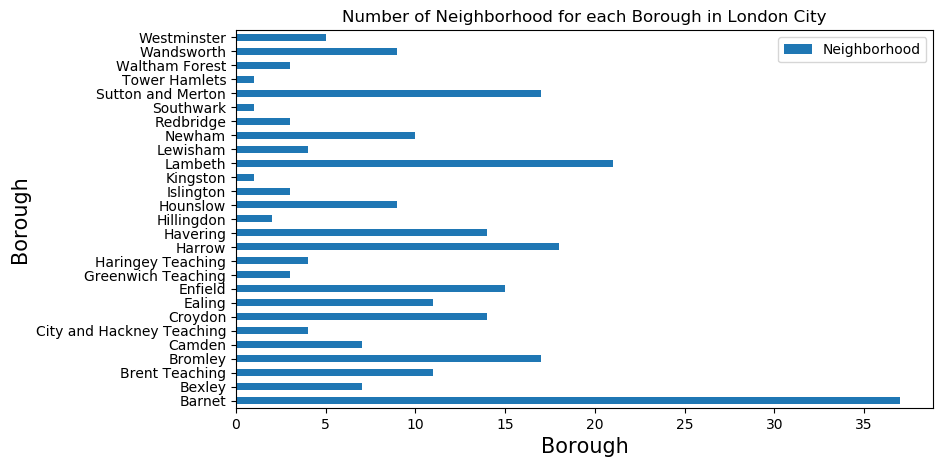

In [15]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in London City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
df2.groupby('Borough')['Neighborhood'].count().plot(kind='barh')
#legend
plt.legend()
#displays the plot
plt.show()

So, based on the above  Bar chart, *Barnet* has the maxiumum number of neighborhoods where as least would be kingston

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

We're interested in venues in 'food' category, but only those that are proper restaurants - coffe shops, pizza places, bakeries etc. are not direct competitors so we don't care about those. So we will include in out list only venues that have 'restaurant' in category name, and we'll make sure to detect and include all the subcategories of specific 'Indian restaurant' category, as we need info on Indian restaurants in the neighborhood.

Now, let's check with locality has more number of Indian restuarants in their neighborhood in London

In [37]:
# Defining Four sqaure credentials and version
CLIENT_ID = '3RUIG2GJAA1CRSRMOZSI2FVKUZHGTEFJP0BJIFDTEKNSJHP3' # your Foursquare ID
CLIENT_SECRET = '5FLVEUNJA3P1VNJGI200O4PQHF05H2SXVUTB0QDAQNOGRRI3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: 3RUIG2GJAA1CRSRMOZSI2FVKUZHGTEFJP0BJIFDTEKNSJHP3
CLIENT_SECRET:5FLVEUNJA3P1VNJGI200O4PQHF05H2SXVUTB0QDAQNOGRRI3


In [34]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
      
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [41]:
 def get_venue_details(venue_id):       
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

## Methodology <a name="methodology"></a>

In the below section , we will direct our efforts detecting on the areas of London that have Indian restuarants. Also, we will particulary concentrate on the areas which has more number of South Asian population with less number of Indian restuarants. 

In first step we have collected the required **data: location and type (category) of every restaurant. We have also **identified Indian restaurants** (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of '**restaurant ratings**,**Likes** and **Tips** across different areas of London - we will use **Bar,pie charts along with maps** to identify a few promising areas which has Indian resturants in general and focus our attention on those areas.

In third and final step we will focus on most promising areas and identify the locations which has highest and least population of South Asian countries and map them. 

## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's identify the **Indian restaurants in every boroughs based on latitudes and longitudes**:

In [19]:
# Fetch the records to identify only Indian restuarants in the mentioned latitudes and longitudes

count=1
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ln=pd.DataFrame(columns=column_names)

for row in df2.values.tolist():
    Borough, latitude, longitude, Neighborhood =row
    venues = get_venues(latitude,longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(df2),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ln = indian_rest_ln.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    
count+=1  

( 1 / 251 ) Indian Resturants in Clapham Town, Lambeth:2
( 1 / 251 ) Indian Resturants in Roehampton and Putney Heath, Wandsworth:0
( 1 / 251 ) Indian Resturants in Mill Hill, Barnet:0
( 1 / 251 ) Indian Resturants in Finchley Church End, Barnet:1
( 1 / 251 ) Indian Resturants in Clapham Town, Lambeth:3
( 1 / 251 ) Indian Resturants in Eltham South, Greenwich Teaching:0
( 1 / 251 ) Indian Resturants in Enfield Highway, Enfield:0
( 1 / 251 ) Indian Resturants in Goodmayes, Redbridge:0
( 1 / 251 ) Indian Resturants in Cray Valley East, Bromley:0
( 1 / 251 ) Indian Resturants in Biggin Hill, Bromley:0
( 1 / 251 ) Indian Resturants in West Finchley, Barnet:3
( 1 / 251 ) Indian Resturants in Gipsy Hill, Lambeth:1
( 1 / 251 ) Indian Resturants in Greenford Broadway, Ealing:1
( 1 / 251 ) Indian Resturants in Regent's Park, Westminster:1
( 1 / 251 ) Indian Resturants in Regent's Park, Camden:0
( 1 / 251 ) Indian Resturants in Bishopsgate, City and Hackney Teaching:0
( 1 / 251 ) Indian Resturan

In [40]:
indian_rest_ln.head()

,Borough,Neighborhood,ID,Name
0,Lambeth,Clapham Town,5262d460498e769d304e7e18,Zumbura
1,Lambeth,Clapham Town,4bdb36d92a3a0f471ef6adb6,Maharani
2,Barnet,Finchley Church End,4eac63f1dab40d1327148133,Cochin
3,Lambeth,Clapham Town,4cc8761abfe1f04d885f0875,Palace Spice
4,Lambeth,Clapham Town,5262d460498e769d304e7e18,Zumbura


In [21]:
#After verifying the data , I found that a few Id's have duplicate entries with same Id 
#indian_rest_ln.shape
print('There are {} uniques Ids.'.format(len(indian_rest_ln['ID'].unique())))

There are 158 uniques Ids.


In [22]:
# Now, using drop_duplicates function i am deleting the duplicate records 

london_rest=indian_rest_ln.drop_duplicates()

In [23]:
london_rest.shape

(202, 4)

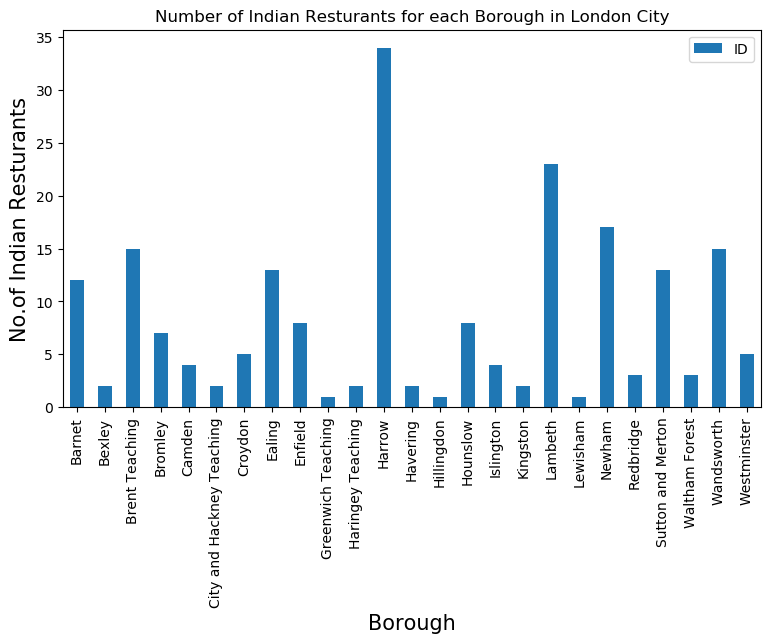

In [24]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Borough in London City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
london_rest.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Based on the above graph, we can clearly say that **Harrow** has more number of Indian Restuarants followed by **Lambeth** with least in **Hillington and Lewisham **

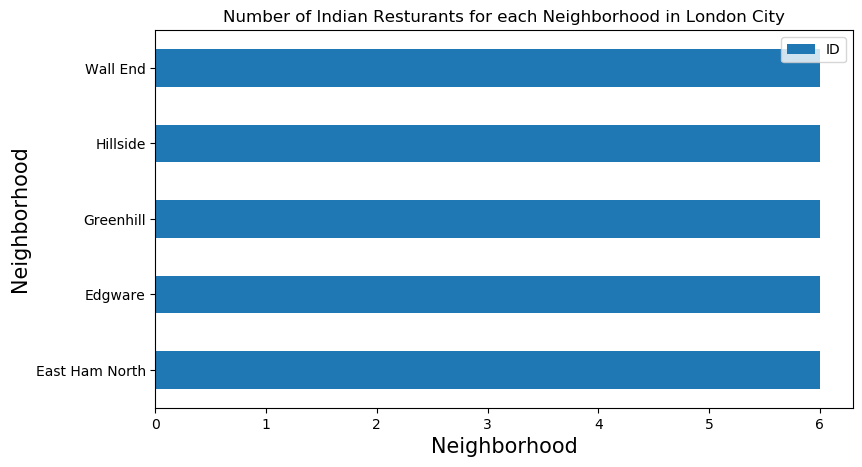

In [25]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Neighborhood in London City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
london_rest.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='barh')
#legend
plt.legend()
#displays the plot
plt.show()

Above graph suggests that **Wall End,Hillside,Greenhill,Edgware,East Ham North**  has maximum number of Indian resturants i.e. **6**

In [32]:
# Lets check for one of the neighborhood Wandsworth Common which is in Wandsworth Borough which has more number of Indian restuarants
london_rest[london_rest['Neighborhood']=='Wall End']

,Borough,Neighborhood,ID,Name
160,Newham,Wall End,4da9db35cda1652a2b7ecfcb,Taste Of India
161,Newham,Wall End,4ac518e5f964a52000ab20e3,Saravanaa Bhavan
162,Newham,Wall End,51b0b154498ecca5e9bf164c,Ananthapuram (Traditional Kerala Restaurant)
163,Newham,Wall End,4c7eb099e4b06dcbdfe144d7,Chennai Dosa
164,Newham,Wall End,4c4c90029e6dbe9a7ea5ae0d,Hyderabadi Spice
165,Newham,Wall End,4e0f940ab0fb59de67e1cd8f,Suvai Chettinaad


Here,lets prepare a list of neighborhoods which contains the indian restuarants along with the restuarant ratings,likes and Tips

In [45]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ln=pd.DataFrame(columns=column_names)
count=1


for row in london_rest.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ln),')','processed')
    indian_rest_stats_ln = indian_rest_stats_ln.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID     Name  Likes  Rating  Tips
0  5262d460498e769d304e7e18  Zumbura     16     7.5     9
( 1 / 231 ) processed
                         ID      Name  Likes  Rating  Tips
0  4bdb36d92a3a0f471ef6adb6  Maharani      9     6.6     4
( 2 / 231 ) processed
                         ID    Name  Likes  Rating  Tips
0  4eac63f1dab40d1327148133  Cochin      7     7.3     4
( 3 / 231 ) processed
                         ID          Name  Likes  Rating  Tips
0  4cc8761abfe1f04d885f0875  Palace Spice     14     8.2     6
( 4 / 231 ) processed
                         ID    Name  Likes  Rating  Tips
0  4c68595f7963be9a3b46cdbc  Khan's      4     6.1     2
( 5 / 231 ) processed
                         ID    Name  Likes  Rating  Tips
0  4eac63f1dab40d1327148133  Cochin      7     7.3     4
( 6 / 231 ) processed
                         ID  Name  Likes  Rating  Tips
0  4e2b2ab718a80bb058565445  Rani      7     6.6     7
( 7 / 231 ) processed
Empty DataFrame
Columns: [ID, Name

KeyError: 'venue'

As we have only 50 premium calls per day ,we would be able to fetch 50 venue details with tips,rating and likes information

In [46]:
    indian_rest_stats_ln.shape

(50, 7)

In [47]:
# let's copy every stats of the ratings to a file to avoid further running of the foursquare api. As it is a premium call, per day we are allowed to make only 500
indian_rest_stats_ln.to_csv('indian_rest_stats_ln.csv', index=False)
indian_rest_stats_london=pd.read_csv('indian_rest_stats_ln.csv')
indian_rest_stats_london.shape
indian_rest_stats_london.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Lambeth,Clapham Town,5262d460498e769d304e7e18,Zumbura,16,7.5,9
1,Lambeth,Clapham Town,4bdb36d92a3a0f471ef6adb6,Maharani,9,6.6,4
2,Barnet,Finchley Church End,4eac63f1dab40d1327148133,Cochin,7,7.3,4
3,Lambeth,Clapham Town,4cc8761abfe1f04d885f0875,Palace Spice,14,8.2,6
4,Lambeth,Clapham Town,4c68595f7963be9a3b46cdbc,Khan's,4,6.1,2


In [48]:
# Now,let's identify which resturant has maximum number of likes
indian_rest_stats_london.loc[indian_rest_stats_london['Likes'].idxmax()]

Borough                      Westminster
Neighborhood                    West End
ID              55a7b3a9498e07b375ea307d
Name                             Dishoom
Likes                               1629
Rating                               9.3
Tips                                 395
Name: 28, dtype: object

In [49]:
# Now,let's identify which resturant has maximum number of rating
indian_rest_stats_london.loc[indian_rest_stats_london['Rating'].idxmax()]

Borough                      Westminster
Neighborhood                    West End
ID              55a7b3a9498e07b375ea307d
Name                             Dishoom
Likes                               1629
Rating                               9.3
Tips                                 395
Name: 28, dtype: object

In [50]:
# Now,let's identify which resturant has maximum number of Tips
indian_rest_stats_london.loc[indian_rest_stats_london['Tips'].idxmax()]

Borough                      Westminster
Neighborhood                    West End
ID              55a7b3a9498e07b375ea307d
Name                             Dishoom
Likes                               1629
Rating                               9.3
Tips                                 395
Name: 28, dtype: object

In [51]:
# Remove the restuarants which has 0 rating as it might be established new 
indian_rest_stats_london=indian_rest_stats_london[indian_rest_stats_london['Rating']>0.0]
indian_rest_stats_london.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Lambeth,Clapham Town,5262d460498e769d304e7e18,Zumbura,16,7.5,9
1,Lambeth,Clapham Town,4bdb36d92a3a0f471ef6adb6,Maharani,9,6.6,4
2,Barnet,Finchley Church End,4eac63f1dab40d1327148133,Cochin,7,7.3,4
3,Lambeth,Clapham Town,4cc8761abfe1f04d885f0875,Palace Spice,14,8.2,6
4,Lambeth,Clapham Town,4c68595f7963be9a3b46cdbc,Khan's,4,6.1,2


Above criteria says that, **Dishoom restuarant** is the most popular **Indian restuarant** in all the neighborhoods which is located in **Westminster Borough** and **West End Neighborhood**.
It has maximum rating as **9.3** and Tips of **395** respectively.It is the most **liked** place by many people.

(-1.1000000108547585,
 1.100000020293666,
 -1.1031629788035828,
 1.1129548524692476)

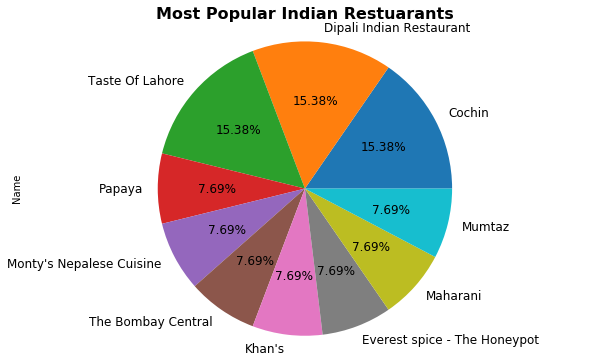

In [52]:
#Let's visualise top 10 best Indian resturants based on their Likes,Name and Borough
indian_rest_stats_london[['Name', 'Likes', 'Borough', 'Rating']].sort_values(ascending=False, by="Likes")[0:10]
indian_rest_stats_london['Name'].value_counts().sort_values(ascending=False).head(10)
indian_rest_stats_london['Name'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6),fontsize=12,autopct='%1.2f%%')
plt.title("Most Popular Indian Restuarants",fontsize=16,fontweight="bold")
plt.axis('equal')

In [53]:
# Now,let's identify which resturant has least number of rating
indian_rest_stats_london.loc[indian_rest_stats_london['Rating'].idxmin()]

Borough                           Newham
Neighborhood           Forest Gate South
ID              4cf149b68333224b3364098e
Name                       The Spice Inn
Likes                                  4
Rating                               5.5
Tips                                  10
Name: 20, dtype: object

In [54]:
#Now,let's check with borough has maximum average rating of indian restuarants
column_names=['Borough','Average Rating']

borough_stats=indian_rest_stats_london.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
borough_stats.columns=column_names
borough_stats.head()

,Borough,Average Rating
0,Barnet,6.950000
1,City and Hackney Teaching,7.700000
2,Ealing,7.060000
3,Enfield,6.800000
4,Harrow,6.883333


In [55]:
#Let's fetch top 10 boroughs which has best average rating 
borough_top5=borough_stats.nlargest(5,'Average Rating')
borough_top5

,Borough,Average Rating
10,Westminster,8.733333
1,City and Hackney Teaching,7.700000
6,Lambeth,7.157143
2,Ealing,7.060000
5,Kingston,7.000000


It is identified that **WestMinster** Borough has the best Average rating for Indian restuarants.

In [56]:
#Let's do similar check for the neighbourhood which has best average rating
column_names=['Neighborhood','Average Rating']

neigh_stats=indian_rest_stats_london.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
neigh_stats.columns=column_names
neigh_stats.head()

,Neighborhood,Average Rating
0,Clapham Town,7.10
1,Cleveland,7.50
2,Coombe Hill,7.00
3,Edgware,6.86
4,Finchley Church End,7.30


In [57]:
#Let's fetch top 10 neighborhoods which has best average rating 
neigh_top5=neigh_stats.nlargest(5,'Average Rating')
neigh_top5

,Neighborhood,Average Rating
17,West End,9.2
10,Regent's Park,7.8
13,Stoke Newington,7.7
6,Gipsy Hill,7.6
1,Cleveland,7.5


In [58]:
#Let's fetch top 10 neighborhoods which has best average rating 
# Here we are ignoring the bottom records which has rating as 0 which either means it's open recently or doesn't have ratings
#neigh_stats=neigh_stats[neigh_stats['Average Rating']>0.0]
neigh_bottom5=neigh_stats.nsmallest(5,'Average Rating',keep='last')
neigh_bottom5

,Neighborhood,Average Rating
12,St Helier,6.0
5,Forest Gate South,6.1
15,Village,6.4
9,Mill Hill,6.6
20,Winchmore Hill,6.8


So, based on this analysis, **West end** neighborhood has best rating restuarants with average rating of **9.2** followed by **Regents Park**Neighborhood with 7.8.Where as, **St Helier,Forest Gate South neighborhoods** has the Least Average ratings as 6.0,6.1 respectively

No handles with labels found to put in legend.


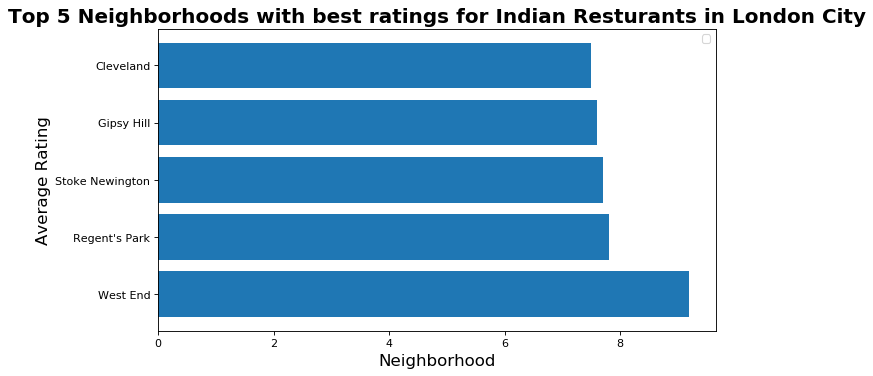

In [59]:

plt.figure(figsize=(9,5), dpi = 80)

# title
plt.title('Top 5 Neighborhoods with best ratings for Indian Resturants in London City',fontweight="bold",fontsize=18)
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
plt.barh("Neighborhood","Average Rating",data=neigh_top5)
#legend
plt.legend()
#displays the plot
plt.show()


No handles with labels found to put in legend.


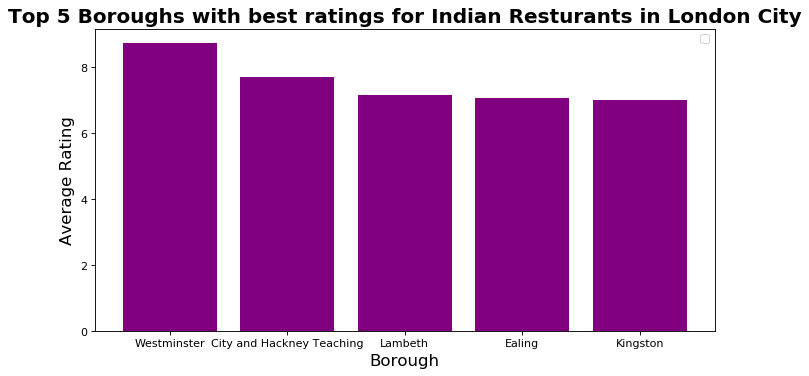

In [60]:
# Let's check for top 5 borough's in London
plt.figure(figsize=(10,5), dpi = 80)

# title
plt.title('Top 5 Boroughs with best ratings for Indian Resturants in London City',fontsize=18,fontweight="bold")
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
plt.bar("Borough","Average Rating",data=borough_top5,color='purple')
#legend
plt.legend()
#displays the plot
plt.show()


**Here,we will update the top 5 neighborhoods and bottom5 neighborhoods/boroughs with latitudes and longitudes and plot a follium map to identify the best and worst rated locality for indian restuarants**

In [62]:
# Now based on the top 5 neighborhood's , merge with main dataframe to fetch the latitudes and longitudes
neigh_stats_top5=pd.merge(neigh_top5,df2, on='Neighborhood')


In [63]:
# Now based on the top 5 neighborhood's , merge with main dataframe to fetch the latitudes and longitudes
neigh_stats_bottom5=pd.merge(neigh_bottom5,df2, on='Neighborhood')
neigh_stats_bottom5

,Neighborhood,Average Rating,Borough,latitude,longitude
0,St Helier,6.0,Sutton and Merton,51.394865,-0.201853
1,Forest Gate South,6.1,Newham,51.546542,0.013594
2,Village,6.4,Sutton and Merton,51.419049,-0.227986
3,Village,6.4,Sutton and Merton,51.416732,-0.244355
4,Mill Hill,6.6,Barnet,51.610721,-0.209299
5,Mill Hill,6.6,Barnet,51.612287,-0.244172
6,Mill Hill,6.6,Barnet,51.624948,-0.236388
7,Mill Hill,6.6,Barnet,51.615434,-0.241119
8,Mill Hill,6.6,Barnet,51.614737,-0.244424
9,Winchmore Hill,6.8,Enfield,51.622655,-0.113723


In [64]:
neigh_stats_top5.rename(columns={'Average Rating':'Average_Rating'},inplace=True)
neigh_stats_top5


,Neighborhood,Average_Rating,Borough,latitude,longitude
0,West End,9.2,Westminster,51.513233,-0.141234
1,West End,9.2,Westminster,51.510632,-0.140519
2,Regent's Park,7.8,Westminster,51.529471,-0.167965
3,Regent's Park,7.8,Camden,51.536579,-0.141350
4,Regent's Park,7.8,Westminster,51.532267,-0.170218
5,Regent's Park,7.8,Camden,51.530784,-0.135430
6,Stoke Newington,7.7,City and Hackney Teaching,51.560967,-0.078261
7,Gipsy Hill,7.6,Lambeth,51.429812,-0.089941
8,Cleveland,7.5,Ealing,51.513922,-0.321609


In [65]:
# Let's plot a folium map to match this in the map for the best rating restuarants
map_indian_rest_london = folium.Map(location=[latitude,longitude],zoom_start=12)

for lat,lng,borough,neighbourhood,average_rating in zip(neigh_stats_top5['latitude'],neigh_stats_top5['longitude'],neigh_stats_top5['Borough'],neigh_stats_top5['Neighborhood'],neigh_stats_top5['Average_Rating']):
    label = '{}, {}, {}'.format(neighbourhood, borough,average_rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_indian_rest_london)
map_indian_rest_london

In [66]:
# Let's plot a folium map to match this in the map for the worst rating restuarants
map_indian_rest_worst = folium.Map(location=[latitude,longitude],zoom_start=12)

for lat,lng,borough,neighbourhood,average_rating in zip(neigh_stats_bottom5['latitude'],neigh_stats_bottom5['longitude'],neigh_stats_bottom5['Borough'],neigh_stats_bottom5['Neighborhood'],neigh_stats_bottom5['Average Rating']):
    label = '{}, {}, {}'.format(neighbourhood, borough,average_rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_indian_rest_worst)
map_indian_rest_worst

**Now lets identify the  Indian population present in london based on the below data frame. This helps us to identify the Boroughs and neighborhoods which has more of South Asian population such as India,Pakistan ,Bhutan and Srilanka who usually prefer Indian cuisine**

In [67]:
# Extract the data from the json file to a pandas dataframe
df_ethnic=pd.read_excel("https://data.london.gov.uk/download/country-of-birth/c61439c3-32ab-4c7d-941e-366d4ac2c57c/cob-borough.xls",'2018')
df_ethnic.shape

(58, 48)

In [68]:
df_ethnic.head(10)

,Area Code,Area Name,Total,Unnamed: 3,Unnamed: 4,United Kingdom,Unnamed: 6,Non-United Kingdom,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sub-Saharan Africa,NaN,North Africa,NaN,North America,NaN,Central and South America,NaN,Oceania,NaN
2,NaN,NaN,estimate,CI +/-,NaN,estimate,CI +/-,estimate,CI +/-,NaN,...,estimate,CI +/-,estimate,CI +/-,estimate,CI +/-,estimate,CI +/-,estimate,CI +/-
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E09000001,City of London,:,:,NaN,:,:,:,:,NaN,...,:,:,:,:,:,:,:,:,:,:
5,E09000002,Barking and Dagenham,215,z,NaN,136,19,79,15,NaN,...,15,6,1,2,c,c,3,3,.,.
6,E09000003,Barnet,391,z,NaN,243,35,148,27,NaN,...,22,10,3,4,4,5,6,6,2,3
7,E09000004,Bexley,249,z,NaN,207,25,42,11,NaN,...,10,5,.,.,c,c,2,2,c,c
8,E09000005,Brent,328,z,NaN,158,25,171,26,NaN,...,29,11,6,5,c,c,12,7,2,3
9,E09000006,Bromley,332,z,NaN,272,34,60,16,NaN,...,13,8,.,.,2,3,3,4,3,3


In [70]:
#Before merging the columns rename the column of latitudes and longitudes file for postal code
df_ethnic.rename(columns={'Unnamed: 31':'Estimate_SouthAsia','Unnamed: 32':'Future_SouthAsia','Area Name':'Borough'},inplace=True)


In [71]:
df_SouthAsia_ethnic=df_ethnic[['Area Code','Borough','Estimate_SouthAsia','Future_SouthAsia']]
df_SouthAsia_ethnic.head(10)

,Area Code,Borough,Estimate_SouthAsia,Future_SouthAsia
0,NaN,NaN,NaN,NaN
1,NaN,NaN,South Asia,NaN
2,NaN,NaN,estimate,CI +/-
3,NaN,NaN,NaN,NaN
4,E09000001,City of London,:,:
5,E09000002,Barking and Dagenham,28,9
6,E09000003,Barnet,19,10
7,E09000004,Bexley,10,6
8,E09000005,Brent,40,13
9,E09000006,Bromley,9,6


In [72]:
#Now, map and merge Based on Area Code and Area NAme with main borough of london
df_SouthAsia=pd.merge(df_SouthAsia_ethnic,neigh_stats_top5, on='Borough')
df_SouthAsia.shape


(8, 8)

In [76]:
df_SouthAsia

,Area Code,Borough,Estimate_SouthAsia,Future_SouthAsia,Neighborhood,Average_Rating,latitude,longitude
0,E09000007,Camden,16,8,Regent's Park,7.8,51.536579,-0.141350
1,E09000007,Camden,16,8,Regent's Park,7.8,51.530784,-0.135430
2,E09000009,Ealing,44,17,Cleveland,7.5,51.513922,-0.321609
3,E09000022,Lambeth,10,7,Gipsy Hill,7.6,51.429812,-0.089941
4,E09000033,Westminster,10,6,West End,9.2,51.513233,-0.141234
5,E09000033,Westminster,10,6,West End,9.2,51.510632,-0.140519
6,E09000033,Westminster,10,6,Regent's Park,7.8,51.529471,-0.167965
7,E09000033,Westminster,10,6,Regent's Park,7.8,51.532267,-0.170218


In [73]:
#Now, map and merge Based on Area Code and Area NAme with main borough of london
df_SouthAsia_bottom=pd.merge(df_SouthAsia_ethnic,neigh_stats_bottom5, on='Borough')
df_SouthAsia_bottom.shape


(9, 8)

In [77]:
df_SouthAsia_bottom

,Area Code,Borough,Estimate_SouthAsia,Future_SouthAsia,Neighborhood,Average Rating,latitude,longitude
0,E09000003,Barnet,19,10,Mill Hill,6.6,51.610721,-0.209299
1,E09000003,Barnet,19,10,Mill Hill,6.6,51.612287,-0.244172
2,E09000003,Barnet,19,10,Mill Hill,6.6,51.624948,-0.236388
3,E09000003,Barnet,19,10,Mill Hill,6.6,51.615434,-0.241119
4,E09000003,Barnet,19,10,Mill Hill,6.6,51.614737,-0.244424
5,E09000010,Enfield,15,8,Winchmore Hill,6.8,51.622655,-0.113723
6,E09000010,Enfield,15,8,Winchmore Hill,6.8,51.626251,-0.104761
7,E09000010,Enfield,15,8,Winchmore Hill,6.8,51.632956,-0.099554
8,E09000025,Newham,68,19,Forest Gate South,6.1,51.546542,0.013594


In [74]:
# Let's visualise both Least and highly populated areas with the average rating in the graph
# Let's plot a folium map to match this in the map for the best rating restuarants
map_population_top= folium.Map(location=[latitude,longitude],zoom_start=12)

for lat,lng,borough,neighbourhood,average_rating in zip(df_SouthAsia['latitude'],df_SouthAsia['longitude'],df_SouthAsia['Borough'],df_SouthAsia['Neighborhood'],df_SouthAsia['Average_Rating']):
    label = '{}, {}, {}'.format(neighbourhood, borough,average_rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_population_top)
map_population_top

In [75]:
# Let's visualise both Least and highly populated areas with the average rating in the graph
# Let's plot a folium map to match this in the map for the worst rating restuarants
map_population_bottom= folium.Map(location=[latitude,longitude],zoom_start=10)

for lat,lng,borough,neighbourhood,average_rating in zip(df_SouthAsia_bottom['latitude'],df_SouthAsia_bottom['longitude'],df_SouthAsia_bottom['Borough'],df_SouthAsia_bottom['Neighborhood'],df_SouthAsia_bottom['Average Rating']):
    label = '{}, {}, {}'.format(neighbourhood, borough,average_rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_population_bottom)
map_population_bottom

**Note: Final Images of the folium maps are attached seperately in the Github site as well as present in the presentation and the final report.**


## Results and Discussion <a name="results"></a>

Our analysis shows that although there is a great number of restaurants in London , there are a few Indian restuarants which are present in highly populated localities and neighborhoods. Highest concentration of restaurants was detected in Westend of Windmister borough, so we focused our attention to areas like Eailing and Hounslow borough with the neighborhood as Eailing Broadway and Brentford.

Based on the above statistics, **South Asian population**  is more in **Newshaw** with the neighborhood as **Forest Gate South** but the **Average rating** for the **Indian restuarants** is at the bottom of **6.1** respectively.
On the other hand ,even though the **South Asian population** is predominately and comparitively less in **WestMinster and other borough's** but those localities has some of the best **Indian restuarants **

Result of all this is shows that the least rated neighborhoods has the new potential Indian restuarants which are yet to be rated by the reviewers . However, as the area is densely populated than other zones ,chances are more likely that resturant would receive better profits if basic necessities and requirements of the people met within the budget.Recommended zones should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify London particularly Indian restaurants in order to aid stakeholders in narrowing down the search for optimal location for a new Indian restaurant. By calculating  existing restaurant ratings and population  density in different neighborhoogs from Foursquare data we have first identified general boroughs that justify further analysis , and then generated extensive collection of locations which satisfy some basic requirements regarding existing nearby restaurants. 
Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.